# Region Classification

Dataset is from Bureau of Labor Statistics (LAUS data) that describes the Unemployment and median household income for the US, states and counties from 2007 to 2018. The dataset consists of 3222 rows and 56 features.

### Objective

The main aim of the project is to identify whether the region comes under metro or non-metro based on the other features by implementing machine learning algorithms. Here, 1 represents metro and 0 represents non-metro in the dataset. 

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score,matthews_corrcoef
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from IPython.display import Image  
import pydotplus
from sklearn import tree
import collections

In [69]:
#Loading the dataset
df = pd.read_excel('E:/College/Analytics/Predictive/Unemployement.xlsx')

In [4]:
df.head(5)

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1001,AL,"Autauga County, AL",2.0,2.0,1,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1
1,1003,AL,"Baldwin County, AL",3.0,2.0,1,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.1,93849.0,90456.0,3393.0,3.6,56607.0,117.5
2,1005,AL,"Barbour County, AL",6.0,6.0,0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4
3,1007,AL,"Bibb County, AL",1.0,1.0,1,8791.0,8432.0,359.0,4.1,...,8550.0,8174.0,376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0
4,1009,AL,"Blount County, AL",1.0,1.0,1,26629.0,25780.0,849.0,3.2,...,24725.0,23726.0,999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1


In [5]:
df.shape

(3222, 56)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 56 columns):
FIPS                                         3222 non-null int64
State                                        3222 non-null object
Area_name                                    3222 non-null object
Rural_urban_continuum_code_2013              3219 non-null float64
Urban_influence_code_2013                    3219 non-null float64
Metro_2013                                   3222 non-null int64
Civilian_labor_force_2007                    3217 non-null float64
Employed_2007                                3217 non-null float64
Unemployed_2007                              3217 non-null float64
Unemployment_rate_2007                       3217 non-null float64
Civilian_labor_force_2008                    3217 non-null float64
Employed_2008                                3217 non-null float64
Unemployed_2008                              3217 non-null float64
Unemployment_rate_2008      

In [9]:
df.isnull().sum().sort_values(ascending=False)

Med_HH_Income_Percent_of_State_Total_2017    81
Median_Household_Income_2017                 81
Unemployed_2009                               5
Employed_2008                                 5
Unemployment_rate_2009                        5
Civilian_labor_force_2009                     5
Unemployment_rate_2008                        5
Unemployed_2008                               5
Employed_2009                                 5
Civilian_labor_force_2008                     5
Unemployed_2007                               5
Employed_2007                                 5
Civilian_labor_force_2007                     5
Unemployment_rate_2007                        5
Civilian_labor_force_2011                     3
Civilian_labor_force_2012                     3
Unemployment_rate_2011                        3
Unemployed_2011                               3
Employed_2011                                 3
Employed_2010                                 3
Unemployment_rate_2010                  

### Data Wrangling

In [70]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum().sort_values(ascending=False)

Med_HH_Income_Percent_of_State_Total_2017    0
Median_Household_Income_2017                 0
Unemployment_rate_2011                       0
Unemployed_2011                              0
Employed_2011                                0
Civilian_labor_force_2011                    0
Unemployment_rate_2010                       0
Unemployed_2010                              0
Employed_2010                                0
Civilian_labor_force_2010                    0
Unemployment_rate_2009                       0
Unemployed_2009                              0
Employed_2009                                0
Civilian_labor_force_2009                    0
Unemployment_rate_2008                       0
Unemployed_2008                              0
Employed_2008                                0
Civilian_labor_force_2008                    0
Unemployment_rate_2007                       0
Unemployed_2007                              0
Employed_2007                                0
Civilian_labo

In [77]:
#df.Metro_2013 = df.Metro_2013.astype('category')
df['Metro_2013'] = pd.Categorical(df.Metro_2013)

In [72]:
df.groupby('State')['Unemployment_rate_2008','Unemployment_rate_2009','Unemployment_rate_2016','Unemployment_rate_2017','Unemployment_rate_2018'].mean()

,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018
State,,,,,
AK,8.376452,9.669735,9.001380,8.684757,8.275271
AL,6.976119,13.171642,6.662687,5.068657,4.491045
AR,6.206667,8.656000,4.622667,4.266667,4.250667
AZ,8.113333,12.933333,7.693333,6.773333,6.713333
CA,8.637931,12.398276,6.929310,6.041379,5.239655
CO,4.604687,6.493750,3.303125,2.712500,3.290625
CT,5.537500,7.737500,5.012500,4.587500,4.000000
DC,6.500000,9.300000,6.100000,6.100000,5.600000
DE,4.966667,8.200000,4.600000,4.600000,3.833333


In [73]:
df.groupby('State')['Median_Household_Income_2017'].mean()

State
AK    61870.174636
AL    42404.388060
AR    40721.160000
AZ    47106.466667
CA    64209.293103
CO    57334.468750
CT    74720.750000
DC    80153.000000
DE    61691.666667
FL    49015.731343
GA    45689.566038
HI    72186.000000
IA    55569.818182
ID    50080.068182
IL    54945.921569
IN    54122.836957
KS    50154.466667
KY    43483.666667
LA    43815.328125
MA    73366.571429
MD    73003.041667
ME    51064.687500
MI    49655.506024
MN    59002.344828
MO    45156.843478
MS    38666.682927
MT    48109.232143
NC    47202.590000
ND    57319.264151
NE    52464.000000
NH    65589.400000
NJ    79707.333333
NM    42273.696970
NV    59202.588235
NY    58872.387097
OH    53755.852273
OK    45381.402597
OR    52247.166667
PA    54338.089552
PR    51090.529449
RI    71402.400000
SC    44504.804348
SD    50095.272727
TN    45429.042105
TX    49346.704724
UT    60148.206897
VA    57947.015038
VT    54743.857143
WA    57016.717949
WI    55833.250000
WV    41751.672727
WY    60179.000000
Name: 

In [74]:
print(df['Metro_2013'].value_counts())

0    1988
1    1234
Name: Metro_2013, dtype: int64


In [13]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

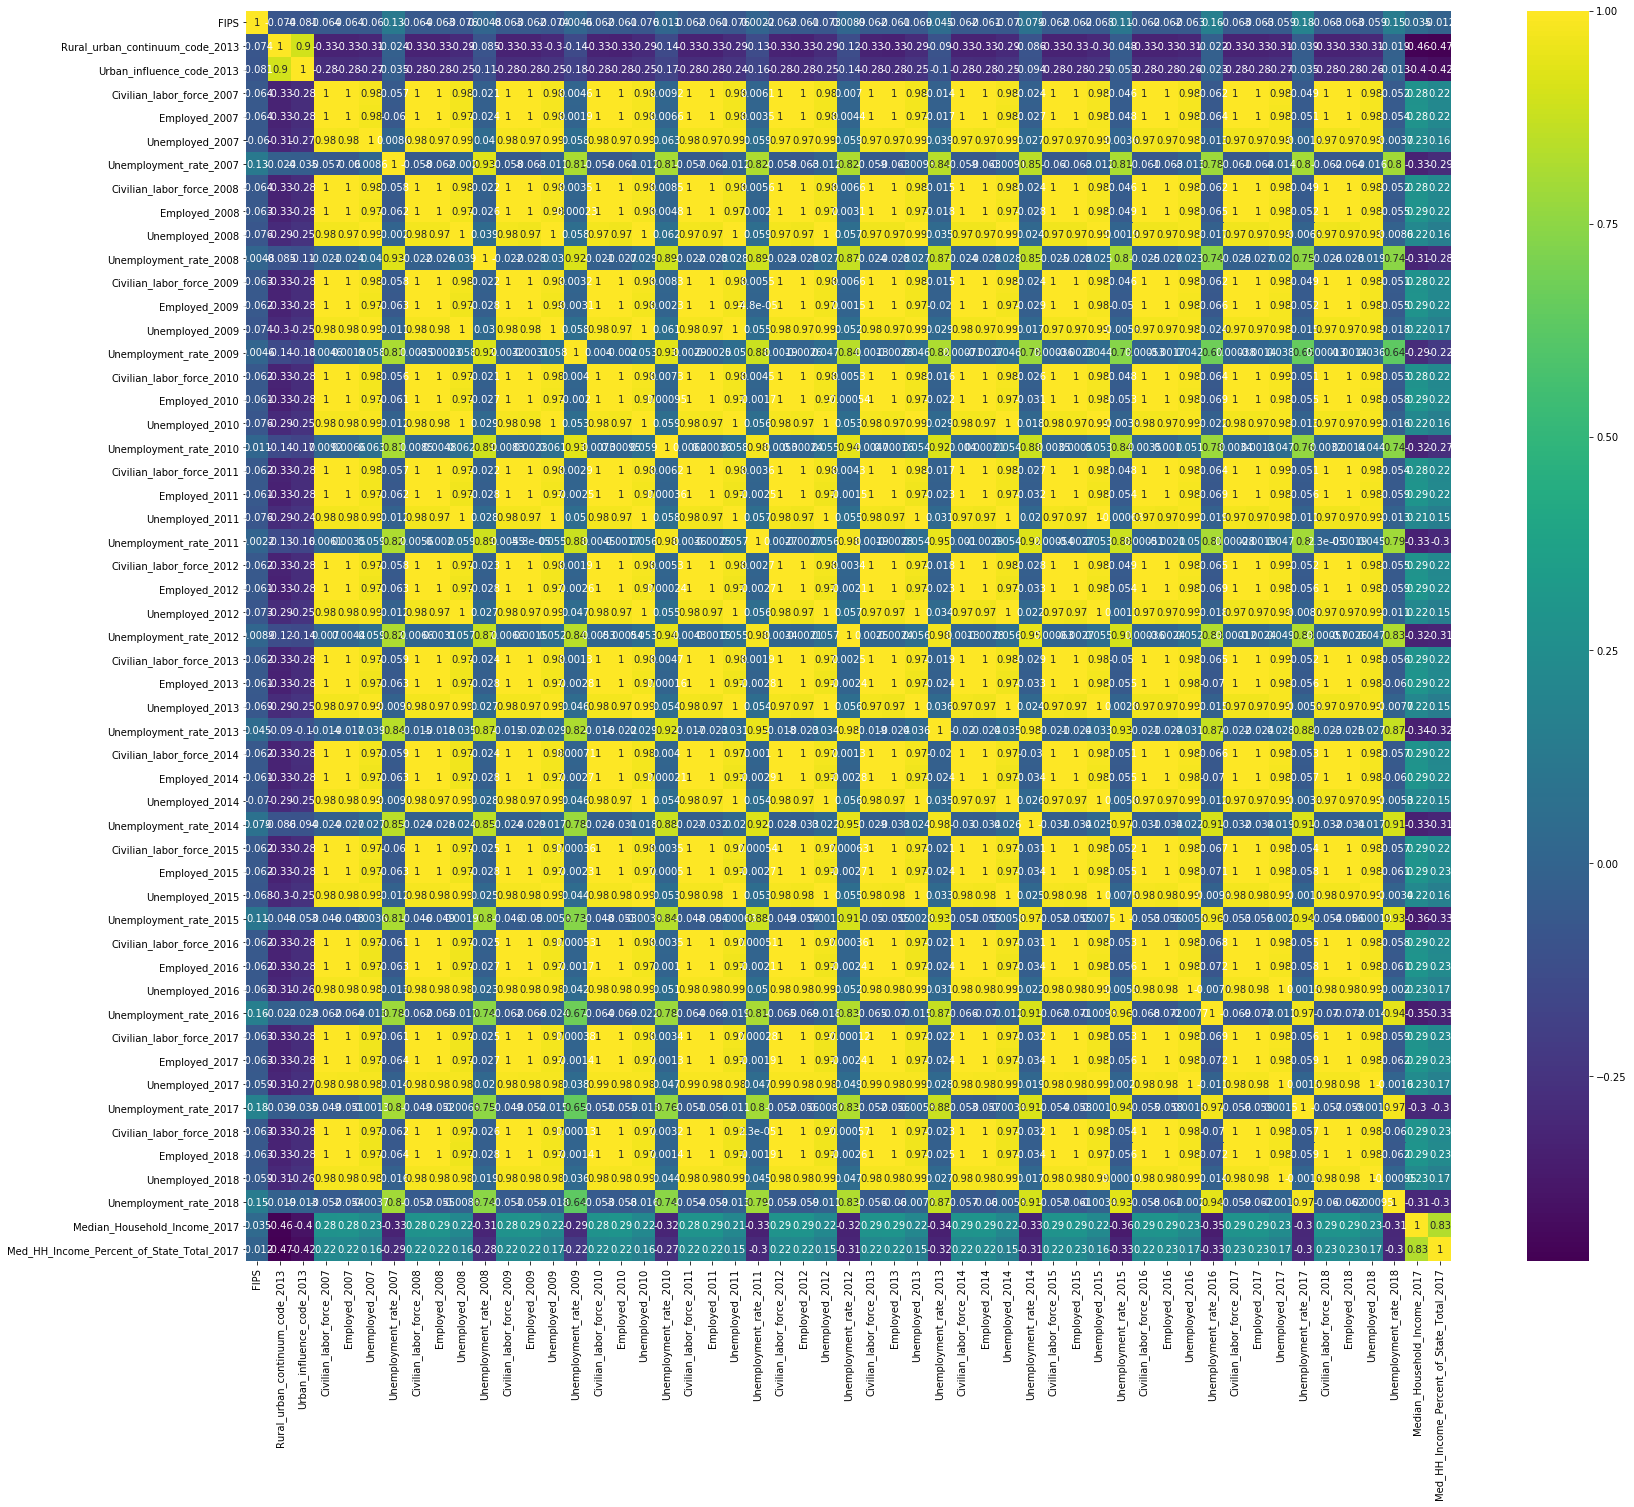

In [14]:
plt.figure(figsize=(27,23))
p=sns.heatmap(df.corr(), annot=True,cmap ='viridis',linecolor='white')

In [15]:
f=list(['Employed_2014','Employed_2015','Unemployed_2007'])
df[f].corr()

,Employed_2014,Employed_2015,Unemployed_2007
Employed_2014,1.000000,0.999953,0.970089
Employed_2015,0.999953,1.000000,0.969843
Unemployed_2007,0.970089,0.969843,1.000000


### Data Visualization

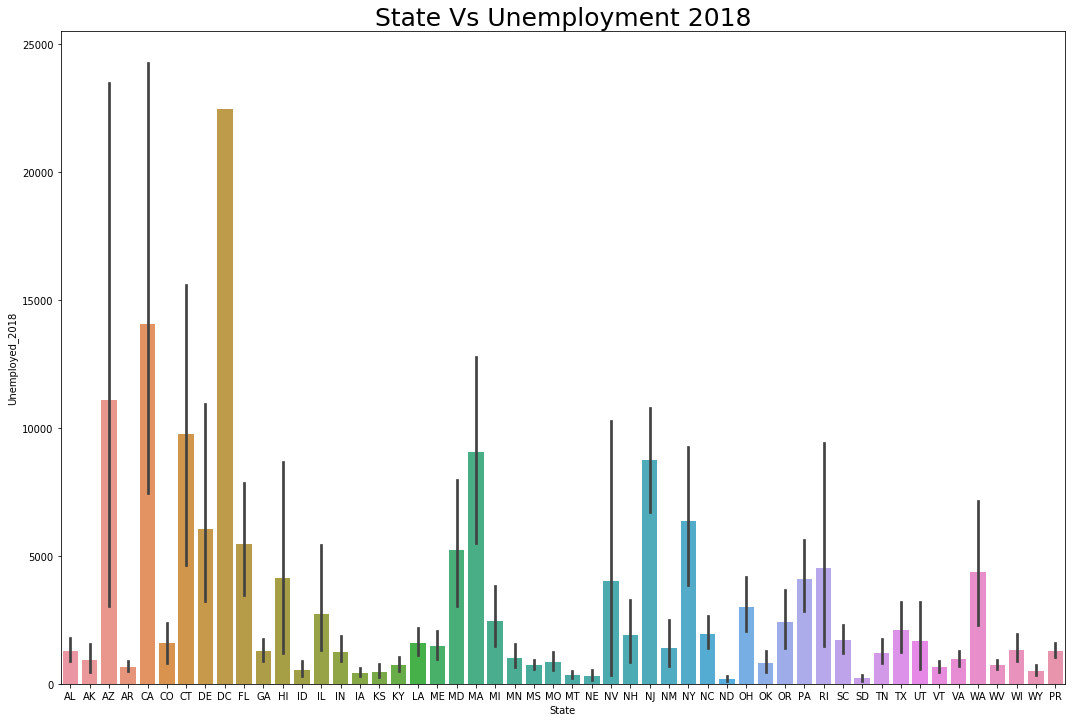

In [16]:
plt.figure(figsize=(18,12))
plt.title('State Vs Unemployment 2018',fontsize=25)
sns.barplot(x= 'State',y= 'Unemployed_2018', data = df)

AxesSubplot(0.125,0.125;0.775x0.755)


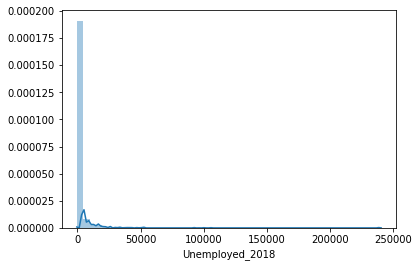

In [17]:
print(sns.distplot(df['Unemployed_2018']))

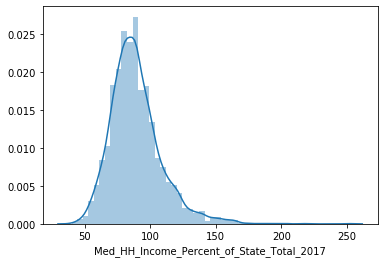

In [18]:
sns.distplot(df['Med_HH_Income_Percent_of_State_Total_2017'])

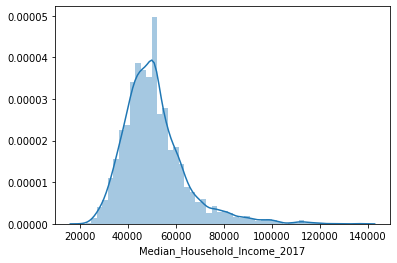

In [19]:
sns.distplot(df['Median_Household_Income_2017'])

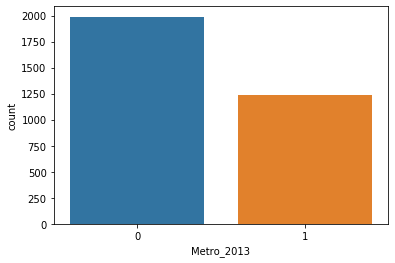

In [20]:
sns.countplot(df['Metro_2013'])

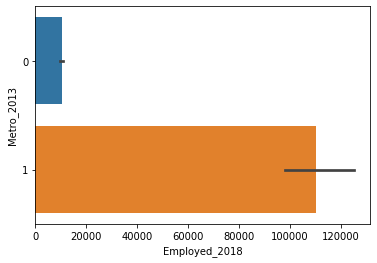

In [21]:
sns.barplot(x= 'Employed_2018',y= 'Metro_2013', data = df)

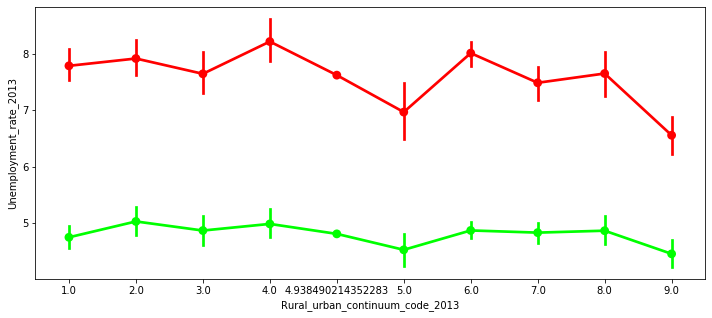

In [22]:
plt.figure(figsize=(12,5))
sns.pointplot(x= 'Rural_urban_continuum_code_2013',y= 'Unemployment_rate_2017', data = df,color='lime',alpha=0.8)
sns.pointplot(x= 'Rural_urban_continuum_code_2013',y= 'Unemployment_rate_2013', data = df,color='red',alpha=0.8)

### Predictive Models

In [76]:
df.drop (columns =['Rural_urban_continuum_code_2013','Urban_influence_code_2013','FIPS','Area_name','State'], inplace = True)

In [78]:
x = df.drop(["Metro_2013"], axis=1).values
y = df['Metro_2013'].cat.codes
x = preprocessing.normalize(x)

In [79]:
# Training, Validation and Test sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=615)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2,random_state=615)

#### K-NN Vaildation model

In [26]:
k_range= range(3,31)
accuracy_list = []

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_val)
    accuracy_list.append(metrics.accuracy_score(y_val,y_pred))

print(accuracy_list)

[0.7422480620155039, 0.7538759689922481, 0.7325581395348837, 0.7441860465116279, 0.7538759689922481, 0.7577519379844961, 0.7461240310077519, 0.7751937984496124, 0.7635658914728682, 0.7751937984496124, 0.7674418604651163, 0.7655038759689923, 0.7635658914728682, 0.7732558139534884, 0.7693798449612403, 0.7635658914728682, 0.7577519379844961, 0.7616279069767442, 0.7674418604651163, 0.7674418604651163, 0.7732558139534884, 0.7674418604651163, 0.7635658914728682, 0.7674418604651163, 0.7616279069767442, 0.7732558139534884, 0.7655038759689923, 0.7713178294573644]


In [27]:
#KNN (K @10->0.775)
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [28]:
pd.crosstab(y_pred,y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,All
Predicted,,,
0,377,109,486
1,28,131,159
All,405,240,645


In [29]:
matthews_corrcoef(y_pred,y_test)

0.5346374024661497

In [30]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.7875968992248062
0.8238993710691824
0.5458333333333333


#### Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [32]:
pd.crosstab(y_pred_nb, y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,All
Predicted,,,
0,246,54,300
1,159,186,345
All,405,240,645


In [33]:
matthews_corrcoef(y_test,y_pred_nb)

0.37058620925003727

In [34]:
print(accuracy_score(y_test,y_pred_nb))
print(precision_score(y_test,y_pred_nb))
print(recall_score(y_test,y_pred_nb))

0.6697674418604651
0.5391304347826087
0.775


In [35]:
confusion_matrix(y_test,y_pred_nb)

array([[246, 159],
       [ 54, 186]], dtype=int64)

#### Bagged Naive Bayes

In [36]:
nb_bag=BaggingClassifier(GaussianNB(),random_state=96,max_samples =20,max_features=9)
nb_bag.fit(x_train, y_train)
nb_pred_bag = nb_bag.predict(x_test)

In [37]:
pd.crosstab(nb_pred_bag, y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,All
Predicted,,,
0,279,68,347
1,126,172,298
All,405,240,645


In [38]:
matthews_corrcoef(y_test,nb_pred_bag)

0.3931973824627234

In [39]:
print(accuracy_score(y_test,nb_pred_bag))
print(precision_score(y_test,nb_pred_bag))
print(recall_score(y_test,nb_pred_bag))

0.6992248062015504
0.5771812080536913
0.7166666666666667


#### Decision Tree using Hyperparameter Tuning

In [40]:
grid= {"min_samples_leaf" : [1,2,3,4,5],"criterion":["gini","entropy"],"max_depth":[3,5,7,9], "max_features":[6,7,8]}
dt=DecisionTreeClassifier(random_state=96)
gridsearch= GridSearchCV(dt,param_grid=grid,cv=10)
gridsearch.fit(x_val, y_val)
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.7751937984496124
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_leaf= 1,max_features=6,random_state=96)
dt.fit(x_train, y_train)
dt_pred= dt.predict(x_test)

In [42]:
pd.crosstab(dt_pred,y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,All
Predicted,,,
0,363,93,456
1,42,147,189
All,405,240,645


In [43]:
print("Accuracy:" + str(np.round(accuracy_score(y_test,dt_pred)*100, 2))+ '%')
print("Precision:" + str(np.round(precision_score(y_test,dt_pred)*100, 2))+ '%')
print("Recall:" + str(np.round(recall_score(y_test,dt_pred)*100, 2))+ '%')

Accuracy:79.07%
Precision:77.78%
Recall:61.25%


In [87]:
roc_auc_score(y_test,dt_pred)

0.7543981481481481

#### Random Forest using Hyperparameter Tuning

In [ ]:
par_grid= {"min_samples_leaf" : [1,2,3,4,5],"criterion":["gini","entropy"],"n_estimators":[20,40,60,80,100],"max_depth":[3,5,7,9],"max_features":[6,7,8]}
rf=RandomForestClassifier(random_state=96)
grid_search= GridSearchCV(rf,param_grid=par_grid,cv=10)
grid_search.fit(x_val, y_val)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [80]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 9,n_estimators=60 ,min_samples_leaf= 2,max_features=7,random_state=96)
rf.fit(x_train, y_train)
rf_pred= rf.predict(x_test)

In [59]:
pd.crosstab(rf_pred, y_test,  rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,All
Predicted,,,
0,382,94,476
1,23,146,169
All,405,240,645


In [60]:
matthews_corrcoef(y_test,rf_pred)

0.6062696754055187

In [61]:
print("Accuracy:" + str(np.round(accuracy_score(y_test,rf_pred)*100, 2))+ '%')
print("Precision:" + str(np.round(precision_score(y_test,rf_pred)*100, 2))+ '%')
print("Recall:" + str(np.round(recall_score(y_test,rf_pred)*100, 2))+ '%')

Accuracy:81.86%
Precision:86.39%
Recall:60.83%


In [62]:
roc_auc_score(y_test,rf_pred)

0.7757716049382717

In [64]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       405
           1       0.86      0.61      0.71       240

    accuracy                           0.82       645
   macro avg       0.83      0.78      0.79       645
weighted avg       0.83      0.82      0.81       645



### Important Features

Text(0.5, 1.0, 'Top 10 Features importance')

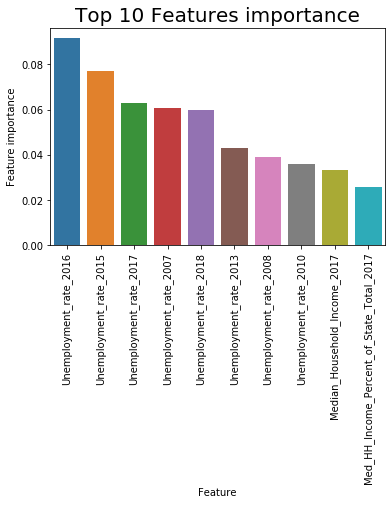

In [86]:
features = list(df.columns[:53])
del features[2]
tmp=pd.DataFrame({'Feature': features,'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False).head(10)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s.set_title('Top 10 Features importance',fontsize=20)

In [46]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

In [47]:
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

In [56]:
#graph.write_png('tree.png')
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())